**1.** ([Boyce e Diprima, 2024](https://app.minhabiblioteca.com.br/reader/books/9788521638841/epubcfi/6/44%5B%3Bvnd.vst.idref%3Dchapter10%5D!/4/1150/100/3:66%5Best%2Co.%5D)) Sabendo que a solução $u(x, y)$ da equação de Laplace no retângulo $0<x<a, 0<y<b$, que satisfaz as condições de contorno

$$
\begin{array}{lll}
u(0, y)=0, & u(a, y)=f(y), & 0<y<b \\
u(x, 0)=0, & u_y(x, b)=0, & 0<x<a .
\end{array}
$$

é dada por

$$
u(x, y)=\sum_{n=l}^{\infty} c_n \operatorname{senh}\left(\frac{(2 n-1) \pi x}{2 b}\right) \operatorname{sen}\left(\frac{(2 n-1) \pi y}{2 b}\right)$$

com

$$c_n=\frac{2 / b}{\operatorname{senh}((2 n-1) \pi a / 2 b)} \int_0^b f(y) \operatorname{sen}\left(\frac{(2 n-1) \pi y}{2 b}\right) dy$$

Verifique, usando SymPy, que para $f(y)=y(2 b-y)$, tem-se

$$c_n=\frac{32 b^2}{(2 n-1)^3 \pi^3 \operatorname{senh}((2 n-1) \pi a / 2 b)}$$

Então, obtenha uma solução numérica para o caso de $a=3$ e $b=2$ e compare os gráficos da solução numérica e da solução exta.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, sinh, pi, sum

**Obtendo uma aproximação a partir da solução exata**

In [2]:
a = 3; b = 2
cn = lambda n: (32*b**2)/((2*n-1)**3*np.pi**3*np.sinh((2*n-1)*np.pi*a/(2*b)))
n = np.arange(1,100)
nx=12; ny=8
x, y = np.meshgrid(np.linspace(0,a,nx+1),np.linspace(0,b,ny+1))

In [3]:
def u_exat(x,y):
    u = np.zeros((ny+1,nx+1))
    for n in range(1,10):
        u += cn(n)*sinh((2*n-1)*pi*x/(2*b))*sin((2*n-1)*pi*y/(2*b))
    return u

In [4]:
T_exat = np.round(u_exat(x,y),2)
#T_exat

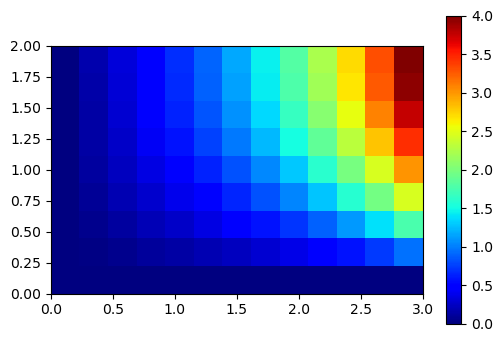

In [5]:
x, y = np.meshgrid(np.linspace(0,a,nx+1),np.linspace(0,b,ny+1))
x_mesh, y_mesh = np.meshgrid(np.linspace(0,a,nx+2),np.linspace(0,b,ny+2))
fig, ax = plt.subplots(figsize=(6, 4))
plt.pcolormesh(x_mesh, y_mesh , T_exat, cmap='jet', shading='flat') 
plt.gca().set_aspect('equal')
plt.colorbar()
plt.show()

**Obtendo uma aproximação numérica por diferenças finitas**

In [6]:
a = 3; b = 2
Lx=a; Ly=b
nx=12; ny=8

In [7]:
hx = Lx/nx
hy = Ly/ny
N = (nx-1) * ny

In [8]:
nos = np.flipud(np.arange(N).T.reshape(ny,nx-1))
print(nos)

[[77 78 79 80 81 82 83 84 85 86 87]
 [66 67 68 69 70 71 72 73 74 75 76]
 [55 56 57 58 59 60 61 62 63 64 65]
 [44 45 46 47 48 49 50 51 52 53 54]
 [33 34 35 36 37 38 39 40 41 42 43]
 [22 23 24 25 26 27 28 29 30 31 32]
 [11 12 13 14 15 16 17 18 19 20 21]
 [ 0  1  2  3  4  5  6  7  8  9 10]]


In [9]:
nos.shape

(8, 11)

In [10]:
# devolve o numero do no em função da posicao (i,j)
def idx(i, j): 
    return np.flipud(nos).T[i,j]

In [11]:
y_coord = np.arange(ny+1)*hy
f = y_coord*(2*b-y_coord)
print(f)

[0.     0.9375 1.75   2.4375 3.     3.4375 3.75   3.9375 4.    ]


In [12]:
# Montagem do sistema
ax = -1.0/hx**2
ay = -1.0/hy**2
ac = -2.0*(ax + ay)

A = np.zeros((N, N), dtype=float)
b = np.zeros(N, dtype=float)

for j in range(0, ny):  
    for i in range(0, nx-1):   
        k = idx(i, j)
        A[k, k] = ac #coeficiente do nó central

        if i > 0:
            A[k, idx(i-1, j)] = ax
        else:
            b[k] -= ax * 0

        if i < nx-2:
            A[k, idx(i+1, j)] = ax
        else:
            #b[k] -= ax * 0 
            b[k] -= ax * f[j]

        if j > 0: 
            A[k, idx(i, j-1)] += ay
        else:
            b[k] -= ay * 0 
    
        if j < ny-1:  # considerando como derivada: (Ti,j-1 - Ti,j)/hy = 0 -> Ti,j-1=Ti,j
            A[k, idx(i, j+1)] += ay 
        else:
            A[k, idx(i, j)] += ay 
            #b[k] -= ay * 0 

In [13]:
T_int = np.linalg.solve(A,b)
T_int = T_int.reshape(ny,nx-1)

In [14]:
x_mesh, y_mesh = np.meshgrid(np.linspace(0,3,nx+2),
                             np.linspace(0,2,ny+2))
x_mesh.shape

(10, 14)

In [15]:
T = np.zeros((ny+1,nx+1))
T[-1,:]=0
T[:,0]=0
T[:,-1]=f

T[1:,1:-1]=T_int

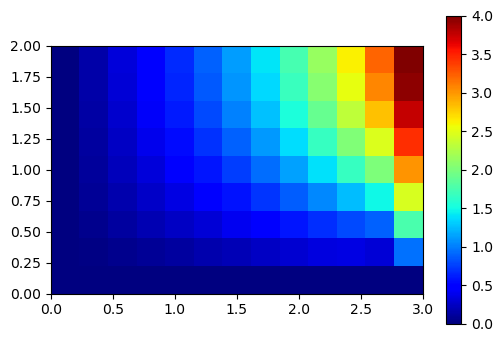

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.pcolormesh(x_mesh, y_mesh, T, cmap='jet', shading='flat') 
plt.gca().set_aspect('equal')

plt.colorbar()
plt.show()

In [17]:
err = np.abs(T_exat-T)

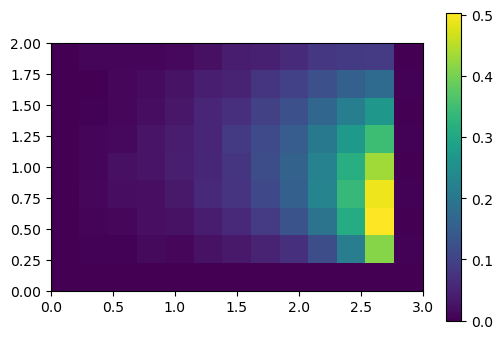

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.pcolormesh(x_mesh, y_mesh, err, shading='flat') 
plt.gca().set_aspect('equal')

plt.colorbar()
plt.show()

**2.** ([Boyce e Diprima, 2024](https://app.minhabiblioteca.com.br/reader/books/9788521638841/epubcfi/6/44%5B%3Bvnd.vst.idref%3Dchapter10%5D!/4/1150/100/3:66%5Best%2Co.%5D)) Sabendo que a solução $u(x, y)$ da equação de Laplace no retângulo $0<x<a, 0<y<b$, que satisfaz as condições de contorno

$$
\begin{array}{lll}
u_x(0, y)=0, & u_x(a, y)=0, & 0<y<b \\
u(x, 0)=0, & u(x, b)=g(x), & 0<x<a
\end{array}
$$

é dada por

$$u(x, y)=\frac{c_0 y}{2}+\sum_{n=1}^{\infty} c_n \cos \left(\frac{n \pi x}{a}\right) \operatorname{senh}\left(\frac{n \pi y}{a}\right)$$

com

$$c_0=\frac{2}{a b} \int_0^a g(x) d x$$

$$c_n=\frac{2 / a}{\operatorname{senh}(n \pi b / a)} \int_0^a g(x) \cos \left(\frac{n \pi x}{a}\right) d x$$

Verifique, usando SymPy, que para $g(x)=1+x^2(x-a)^2$, tem-se

$$c_0=\frac{2}{b}\left(1+\frac{a^4}{30}\right)$$

$$c_n=-\frac{24 a^4(1+\cos (n \pi))}{n^4 \pi^4 \operatorname{senh}(n \pi b / a)}$$

Então, obtenha uma solução numérica para o caso de $a=3$ e $b=2$ e compare os gráficos da solução numérica e da solução exta

In [23]:
import sympy as sp
sp.init_printing()

Calculando os coeficientes $c_0$ e $c_n$ com SymPy.

In [67]:
x, y = sp.symbols('x, y')
a, b = sp.symbols('a, b')
n = sp.symbols('n', integer=True, positive=True)
g = 1+x**2*(x-a)**2

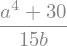

In [68]:
c0 = 2/(a*b) * sp.integrate(g,(x,0,a))
display(sp.simplify(c0))

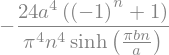

In [69]:
cn = ((2/a)/sp.sinh(n*sp.pi*b/a))*\
     (sp.integrate(g*sp.cos(n*sp.pi*x/a),(x,0,a)))
display(sp.simplify(cn))

Obtendo uma solução numérica. Observemos que há duas fazes isoladas, na esquerda e na direita, ou seja, $u_x(0, y)=0$ e $u_x(a, y)=0$. Assim, os pontos da malha incluirão essas faces. o que fará com que o número de nós na direção $x$ será igual a $n_x+1$ e na direção $y$ será igual a $n_y-1$. Em que $n_x$ e $n_y$ são os números de subdivisões em cada diresção.

In [50]:
a=3; b=2
nx=40; ny=40
hx = a/nx; hy = b/ny

In [51]:
# número de nós nas rireções x e y
nnx = nx+1
nny = ny-1

In [52]:
N = nnx*nny

In [53]:
nos = np.flipud(np.arange(N).T.reshape(nny,nnx))
#print(nos)

In [54]:
# devolve o numero do no em função da posicao (i,j)
def idx(i, j): 
    return np.flipud(nos).T[i,j]

In [55]:
# verificando o sentido de i e j e nos
#    for i in range(0,nnx):
#        print('Nó: (i,j)->(',i,',',j,')->',idx(i,j))

Calculando os valores no contorno $u(x, b)=g(x)$ em que  $g(x)=1+x^2(x-a)^2$.

In [56]:
xi = hx*np.arange(nnx)
g = 1.+xi**2*(xi-a)**2
#plt.plot(xi,g)

In [57]:
xi

array([0.   , 0.075, 0.15 , 0.225, 0.3  , 0.375, 0.45 , 0.525, 0.6  ,
       0.675, 0.75 , 0.825, 0.9  , 0.975, 1.05 , 1.125, 1.2  , 1.275,
       1.35 , 1.425, 1.5  , 1.575, 1.65 , 1.725, 1.8  , 1.875, 1.95 ,
       2.025, 2.1  , 2.175, 2.25 , 2.325, 2.4  , 2.475, 2.55 , 2.625,
       2.7  , 2.775, 2.85 , 2.925, 3.   ])

In [58]:
# devolve o numero do no em função da posicao (i,j)
def idx(i, j): 
    return np.flipud(nos).T[i,j]

In [59]:
# Montagem do sistema
ax = -1.0/hx**2
ay = -1.0/hy**2
ac = -2.0*(ax + ay)

A = np.zeros((N, N), dtype=float)
b = np.zeros(N, dtype=float)

dx0 = 0
dxa = 0

for j in range(0, nny):  
    for i in range(0, nnx):   
        k = idx(i, j)
        A[k, k] = ac #coeficiente do nó central
        
        if i > 0:    #inclui o vizinho da esquerda
            A[k, idx(i-1, j)] += ax
        else: #a menos que seja a borda esquerda
            A[k, idx(i+1, j)] += ax
            b[k] -= ax*(2*hx*dx0)
        
        if i < nnx-1: #inclui o vizinho da direita
            A[k, idx(i+1, j)] += ax
        else:  #a menos que seja a borda direita
            A[k, idx(i-1, j)] += ax
            b[k] -= ax*(2*hx*dxa)

        if j > 0: #inclui o vizinho de baixo
            A[k, idx(i, j-1)] += ay
        else: #a menos que seja a borda de baixo
            b[k] -= ay * 0

        if j < nny-1: #inclui o vizinho de cima
            A[k, idx(i, j+1)] += ay 
        else:  #a menos que seja a borda de cima
            b[k] -= ay * g[i]

In [60]:
T_int = np.linalg.solve(A,b)
T_int = T_int.reshape(nny,nnx)
T  = np.vstack((T_int,g))

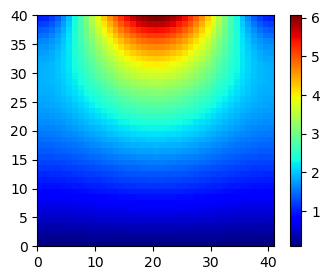

In [61]:
fig, ax = plt.subplots(figsize=(4, 3))
plt.pcolormesh(T, cmap='jet', shading='flat') 
plt.gca().set_aspect('equal')

plt.colorbar()
plt.show()

In [70]:
a, b = sp.symbols('a b')
c0 = c0.subs({a:3,b:2})
cn = cn.subs({a:3,b:2})
cn = sp.lambdify(n, cn)

In [71]:
# definindo uma aproximação para a solução analítica com n_max termos
def T_exat(x, y, n_max):
  soma = 0
  for n in range(1, n_max):
    soma += cn(n)*np.cos(n*np.pi*x/3)*np.sinh(n*np.pi*y/3) 
#    soma += (-24*3**4*(1+np.cos(n*np.pi)))/(n**4*np.pi**4*np.sinh(n*np.pi*2/3))*\
#            np.cos(n*np.pi*x/3)*np.sinh(n*np.pi*y/3) 
#  c0 = (2/2)*(1+3**4/30)
  return (float(c0)*y/2 + soma)

In [72]:
# definindo as coordenadas dos pontos do gráfico
x = np.linspace(0, 3, 41)
y = np.linspace(0, 2, 40)
xx, yy = np.meshgrid(x, y)
zz = T_exat(xx, yy, 100)

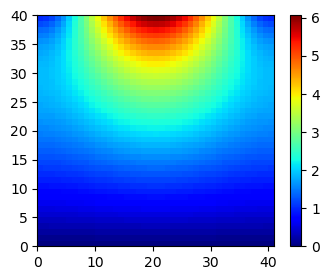

In [73]:
fig, ax = plt.subplots(figsize=(4, 3))
plt.pcolormesh(zz, cmap='jet', shading='flat') 
plt.gca().set_aspect('equal')

plt.colorbar()
plt.show()

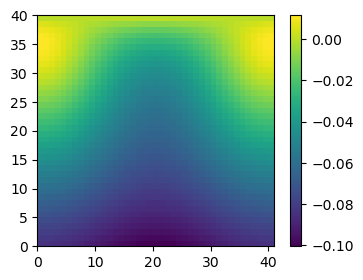

In [74]:
fig, ax = plt.subplots(figsize=(4, 3))
plt.pcolormesh(zz-T, shading='flat') 
plt.gca().set_aspect('equal')

plt.colorbar()
plt.show()